## Defining and training multi-layer artificial neural networks in Keras

Fortunately, the past decade has resulted in a large number of tools to efficiently work with very large, so-called deep neural networks. Among the more prominent tools are <a href="https://en.wikipedia.org/wiki/Theano_(software)">theano</a> and <a href="https://en.wikipedia.org/wiki/TensorFlow">Tensorflow</a>, from the University of Montreal and Google Inc., respectively, and the <a href="https://en.wikipedia.org/wiki/Keras">Keras</a> library to conveniently interface with them. We will be using Keras in this class to study the most important deep neural network architectures. 

Keras provides a series of standard models, the simplest being a sequential model that allows the user to stack layers of artifical neurons together:

In [108]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(2,input_dim=3,kernel_initializer='random_uniform'))

This example creates a sequential neural network with one "dense" layer with 2 artificial neurons, input dimension of 3, and uniformly random initial weights. Keras offers the following options <code>random_uniform</code>, <code>random_normal</code>, and <code>zero</code>, which are self-explanatory. Using a <i>dense</i> layer means that all inputs to a layer are connected to every neuron, and all outputs of a layer connect to all neurons of the next layer. The multi-layer perceptron shown above is a dense network.

## Training a first ANN

Example from Antonio Gulli, “Deep Learning with Keras.” The MNIST data set is a collection of 70000 hand-written digits from 0 to 9 that are provided in a 28x28 matrix. The MNIST data set is part of the ```keras.datasets``` <a href="https://keras.io/datasets/">library</a>. We will further import a simple ```Sequential``` model, creating a ```Dense``` model with custom ```Activation```, the ```SGD``` optimizer, which will be discussed later, and ```np_utils``` for One-Hot encoding.

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility”

Using TensorFlow backend.


### Data preprocessing

The following script will load the MNIST dataset (directly from the keras.datasets library) and turn the 28x28 training images into a series of one-dimensional vectors of length 784. We will also normalize the data to fall into the range from 0 to 1, and turn the class labels into one-hot encoded categorical labels. 

In [6]:
# network and training


# data: shuffled and split between train and test sets
#
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
#
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

60000 train samples
10000 test samples


We can visualize the dataset using Matplotlib:

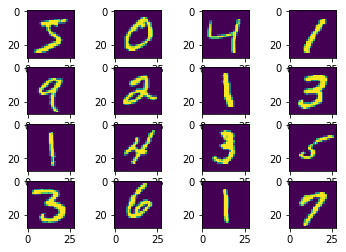

In [15]:
import matplotlib.pyplot as plt
for I in range(4):
    for J in range(4):
        plt.subplot(4,4,I*4+J+1)
        plt.imshow(X_train[I*4+J,:].reshape(28,28))
plt.show()
        


### Neural Network Model
In a first step, we define a neural network with two layers: 10 neurons with 784 inputs and a softmax activation layer. As expected, this network has 7850 parameters, 10 times 784 for the weights and 10 for the bias values.

In keras, a neural network model consists both of the architecture as well as a choice of an objective function, an optimizer, and a metrics. Note, that we are using <code>categorical_crossentropy</code>, which is more suited than <code>mean_squared_error</code> when calculating hte error between model prediction and training data. We are using stochastic gradient descent (SGD) as an optimizer, which is using data to estimate gradients vs. explicitely calculating the gradient as we have done before. The "metrics" parameter is similar to the objective function ("loss"), but is used when evaluating the model, not during training. 

In [31]:
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['categorical_accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                7850      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Training

After defining the model, the optimizer, the loss function and the metric for testing, training the model is a simple call to keras' <code>fit()</code> function. We are presenting the network with 200 instances of the entire dataset ("epochs") and perform a an update of the weights every 128 training samples ("batch size"). Setting <code>verbose</code> to 1 lets us see the progress, and using 0.2 (20%) of the dataset as <code>validation_split</code> lets us observe not only the model fit, but already how the model would perform on unknown data. 

In [32]:
history = model.fit(X_train, Y_train, batch_size=48000, epochs=200, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 1s 21us/step - loss: 2.5532 - categorical_accuracy: 0.1022 - val_loss: 2.4359 - val_categorical_accuracy: 0.1120
Epoch 2/200
48000/48000 [==============================] - 0s 6us/step - loss: 2.5254 - categorical_accuracy: 0.1049 - val_loss: 2.4191 - val_categorical_accuracy: 0.1198
Epoch 3/200
48000/48000 [==============================] - 0s 6us/step - loss: 2.5021 - categorical_accuracy: 0.1097 - val_loss: 2.4031 - val_categorical_accuracy: 0.1260
Epoch 4/200
48000/48000 [==============================] - 0s 6us/step - loss: 2.4875 - categorical_accuracy: 0.1106 - val_loss: 2.3879 - val_categorical_accuracy: 0.1330
Epoch 5/200
48000/48000 [==============================] - 0s 6us/step - loss: 2.4615 - categorical_accuracy: 0.1164 - val_loss: 2.3735 - val_categorical_accuracy: 0.1392
Epoch 6/200
48000/48000 [==============================] - 0s 6us/step - loss: 2.4407 - catego

### Testing

In [23]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 13us/step
Test score: 0.2772996456950903
Test accuracy: 0.9206


An accuracy of 92.27% on the test set sounds great, and that this can be achieved using only 7850 parameters - which after all encode all the knowledge about the dataset - is impressive. Yet, misclassifying every tenth digit is of little practical relevance. In fact, even 99.9% would mean that one out of a thousand digits is misread. When using such a network to identify the zip code on a letter, every 200th letter, on average, would be subject to a wrong reading. 

## Increasing model complexity


We can increase the complexity of the model by adding hidden layers. For example, adding two hidden layers with 128 neurons each, increases the number of parameters to 118,282. In this case, we can obtain a test accuracy of 97.61%. You can further increase model complexity, for example by employing 1280 hidden nodes, resulting in more than 2.6M parameters. This will allow you to exceed 99% on training accuracy, but not much more than 98% on the test. At some point, you will learn an exact representation of the training data, even 100% accuracy on the training set, but not be able to train a network that is able to truly understand what to look for in your data. This is known as <i>overfitting</i>. As a rule of thumb, a network should always be trained so that the accuracy of training exceeds that of the test set, but not too much further as the reason is likely overfitting. 

In [33]:
NB_EPOCH=200
BATCH_SIZE=128


model = Sequential()
model.add(Dense(128, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['categorical_accuracy'])

from keras.utils import plot_model
plot_model(model, show_shapes='true', to_file='figs/model.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
__________

It is also possible to render the neural network graphically using Keras' <code>plot_model</code> module (see above)

<center>
<img src="figs/model.png" width="30%">
</center>

In [34]:
history = model.fit(X_train, Y_train,
batch_size=128, epochs=200,
verbose=1, validation_split=0.2)
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 1s 26us/step - loss: 1.9860 - categorical_accuracy: 0.3219 - val_loss: 1.3298 - val_categorical_accuracy: 0.7560
Epoch 2/200
48000/48000 [==============================] - 1s 19us/step - loss: 1.3170 - categorical_accuracy: 0.5770 - val_loss: 0.7410 - val_categorical_accuracy: 0.8403
Epoch 3/200
48000/48000 [==============================] - 1s 19us/step - loss: 0.9840 - categorical_accuracy: 0.6848 - val_loss: 0.5470 - val_categorical_accuracy: 0.8676
Epoch 4/200
48000/48000 [==============================] - 1s 19us/step - loss: 0.8279 - categorical_accuracy: 0.7381 - val_loss: 0.4554 - val_categorical_accuracy: 0.8858
Epoch 5/200
48000/48000 [==============================] - 1s 20us/step - loss: 0.7354 - categorical_accuracy: 0.7711 - val_loss: 0.3996 - val_categorical_accuracy: 0.8933
Epoch 6/200
48000/48000 [==============================] - 1s 20us/step - loss: 0.6640 - c

Training history is available via Keras' <code>history</code> object. Its a dictionary with the following keys (this depends on how the model was compiled). It is particularly helpful to observe where training and test accuracy start to diverge, which is the point at which further training does not help.

In [37]:
history.history.keys()

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])

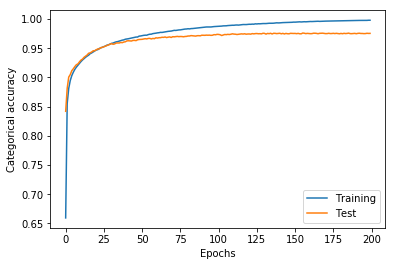

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Categorical accuracy')
plt.legend(['Training','Test'])

# Improving network performance (the old way)

We note that all training so far has been done on the raw 28x28 bytes data. Furthermore, the 2D input data has been turned into a column vector leaving it up to the network to cherry-pick the salient information. In classic machine learning this has never been done. Instead, the trick has always been to carefully engineer features that both reduce the amount of data the network has to deal with and integrate human expert knowledge as best as possible.

Looking at the MNIST data, there are many ideas that come to mind. For example, we might use basic image statistics to generate a first set of features. These could be the percentage of the matrix actually covered by pixels (with the numbers 8 and 9 using more pixels than the number 1, e.g.), the "center of mass" of the images with some numbers like 1 and 8 having a center of mass closer to the center and so on.

We can also convolve the image with a Sobel-like filter to detect edges. Finally, we could downsample the image by grouping pixels into groups of 4x4 or even 7x7, and thresholding them. Here, the idea would be that presence of data in the new 16 or 49 "super-pixels" would actually suffice to classify the digits. 

Here, we first convolve the image with an edge detection kernel, then downsample it to a 7x7 image.

In [69]:

from scipy import signal
from skimage.transform import downscale_local_mean # scikit-image

(X_train_orig, y_train), (X_test_orig, y_test) = mnist.load_data()
X_train=np.zeros((60000,7,7))
X_test=np.zeros((10000,7,7))

for I in range(X_train.shape[0]):
    X_train[I]=downscale_local_mean(signal.convolve2d(X_train_orig[I,:,:]/255,[[-1,-1,-1],[-1,-8,-1],[-1,-1,-1]],mode='valid'),(4,4))
    X_train[I]/=X_train[I].min() # values are negative after convolution

for I in range(X_test.shape[0]):
    X_test[I]=downscale_local_mean(signal.convolve2d(X_test_orig[I,:,:]/255,[[-1,-1,-1],[-1,-8,-1],[-1,-1,-1]],mode='valid'),(4,4))
    X_test[I]/=X_test[I].min()

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

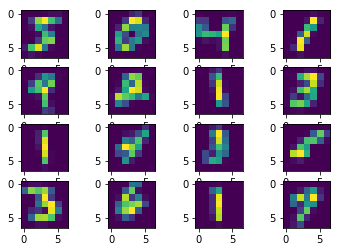

In [70]:
import matplotlib.pyplot as plt
for I in range(4):
    for J in range(4):
        plt.subplot(4,4,I*4+J+1)
        plt.imshow(X_train[I*4+J,:])
plt.show()

In [73]:
X_train=X_train.reshape(60000,49) # 7x7
X_test=X_test.reshape(10000,49)

model = Sequential()
model.add(Dense(100, input_shape=(49,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['categorical_accuracy'])

history = model.fit(X_train, Y_train,batch_size=128, epochs=200, verbose=1, validation_split=0.2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 100)               5000      
_________________________________________________________________
activation_37 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                1010      
_________________________________________________________________
activation_38 (Activation)   (None, 10)                0         
Total params: 6,010
Trainable params: 6,010
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 1s 17us/step - loss: 2.0864 - categorical_accuracy: 0.4040 - val_loss: 1.8903 - val_categorical_accuracy: 0.6118
Epoch 2/200
48000/48000 [=========================

In [74]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 13us/step
Test score: 0.21038885685503483
Test accuracy: 0.9357


This performance is not bad, albeit not as good as our previous attemptes having a deep network find features themselves. To better understand this: when training the network with the full 28x28 pixels, we are letting the network sift through 784 bytes of data to make a decision, which digit an input depicts. In particular, we have no idea what happens inside the network and what it actually ends up looking for. This is different when doing some of the pre-processing ourselves. Specifically, we decided that the majority of the information should be contained in whether a subset of 7x7 "super-pixels" are populated or not. We are then training on the reduced feature set that is represented by only 49 bytes - 16 times less.

Albeit we might be able to hand-engineer better features than those chosen here, even some that are able to ultimately beat a brute-force neural network approach in terms of accuracy, machine learning has developed tools that have made hand-engineering features obsolete, rather take advantage of neural network architectures that in themselves perform preprocessing that are conducive to image and speech recognition. These are known as <i>convolutional neural networks</i>.

## Finding optimal training parameters

Albeit poking around with the different options of the variying machine learning toolkits is a lot easier than hand-coding features, and decisions can partly be informed by a fundamental understanding of the underlying methods (such as provided by this course), what works and what does not still heavily depends on the data actually at hand. For example, the "batch size" is a parameter for which only rough guidelines can be given. Often, playing with certain parameters or even systematically sweeping them can provide some intuition. For example, we can easily test the impact of different batch sizes, by training a model with a couple of different ones.

In [146]:
import time

batch_sizes=[8,16,32,64,128,256,512]
#batch_sizes=[128,256,512]
model = Sequential()
model.add(Dense(NB_CLASSES,input_shape=(784,)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['categorical_accuracy'])

score=np.zeros((len(batch_sizes),2))
times=np.zeros((len(batch_sizes),2))

for I, batch_size in enumerate(batch_sizes):
    t=time.time()
    history = model.fit(X_train, Y_train,batch_size=batch_size, verbose=0, epochs=20, validation_split=VALIDATION_SPLIT)
    score[I] = model.evaluate(X_test, Y_test, verbose=0)
    times[I] = time.time()-t



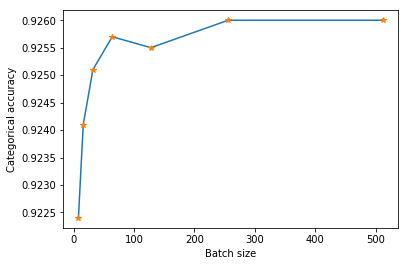

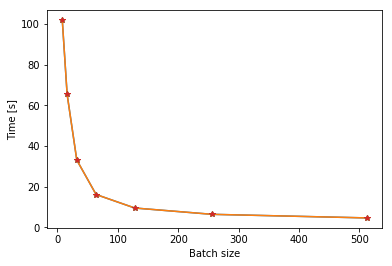

In [148]:
plt.plot(batch_sizes,score[:,1])
plt.plot(batch_sizes,score[:,1],'*')
plt.ylabel('Categorical accuracy')
plt.xlabel('Batch size')
plt.show()

plt.plot(batch_sizes,times)
plt.plot(batch_sizes,times,'*')
plt.ylabel('Time [s]')
plt.xlabel('Batch size')
plt.show()




It is clear from the above experiment, that the batch size actually has an optimum. If too low, the gradient jumps back and forth for every new training instance, if too high, the gradient combines too many experiences into one. We also observe, however, that training becomes much, much slower with smaller batch sizes. 

# Observations

- Coding features by hand as much as possible has been the standard approach to design a machine learning algorithm for many decades. The idea has been that hand-coding leverages as much human expert knowledge as possible, while reducing the data sufficiently to make training a neural network actually tractable. 
- The ability to train also larger networks efficiently, has allowed to create "deep" neural networks that can get very good performance, sometimes even exceeding those of solutions relying on hand-coded features, without much tuning whatsoever.
- We have introduced a new feature without much ado, using a part of the test set for validation. This can help the training algorithm in many ways, for example detecting overfitting, stopping once a certain performance on valiation is met, and others.
- Albeit the validation set can help to determine the optimal number of epochs, that is the number of times a dataset is presented to the network, the "batch size" remains a free parameter. If too low, weights are updated for every training instance, which is very susceptive to noise. If too high, the gradient is averaged over too many instances at once, ignoring possibly important information such as particularly salient examples.  
- Overfitting a neural network during training shows that the network is actually capable of modeling the entire dataset. If this is not possible, the network architecture might be too simple to capture the data's non-linearities, requiring additional nodes or layers. 

 